<a href="https://colab.research.google.com/github/payal500/practice-series-/blob/main/nlp_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/IMDB Dataset.csv',encoding='utf8')

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Lowe case
first need to convert all string into lowercase . so it take similar work as a single token

ex- if have Payal and payal so while doing tokenization it take as two token (words) so it imp. to convert all data to lowecase


In [ ]:
df['review']=df['review'].str.lower()

In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


# remove html tags
its important if our data has html tag like <br <html/ , so we can remove it using regular expressions


In [ ]:
#import re means regular expression
import re
def remove_html_code(text):
  pattern=re.compile('<.*?>')
  return pattern.sub(r'',text)

In [ ]:
#sample case
remove_html_code('<h1. >hello</h1><br>')

'hello'

In [ ]:
df['review']=df['review'].apply(remove_html_code)

In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [ ]:
#remove url tags

def remove_tags(text):
  pattern=re.compile(r'https?://\S+|www\.\S+')
  return pattern.sub(r'',text)

In [ ]:
remove_tags('hdidf www.|google.com kdkdhfihf')

'hdidf  kdkdhfihf'

In [ ]:
df['review']=df['review'].apply(remove_tags)

# punchuation remove

'*#&!@#$%^":;' this all re punchuation mark that not necessary for building model so we can remove


In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
df1=string.punctuation

In [ ]:
def remove_punc(text):
  return text.translate(str.maketrans('','',df1))

In [ ]:
df['review'].apply(remove_punc)

,review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production the filming tech...
2,i thought this was a wonderful way to spend ti...
3,basically theres a family where a little boy j...
4,petter matteis love in the time of money is a ...
...,...
49995,i thought this movie did a down right good job...
49996,bad plot bad dialogue bad acting idiotic direc...
49997,i am a catholic taught in parochial elementary...
49998,im going to have to disagree with the previous...


In [ ]:
#sample case
remove_punc('hello! how are y.#fgijrhg!@U$(75ou? doing@ddf')

'hello how are yfgijrhgU75ou doingddf'

#spelling check

In [ ]:

from textblob import TextBlob

In [ ]:
from typing import Text
incorect_sen='hiii broo yu doiing soo great welk tou knowm'

txtbl=TextBlob(incorect_sen)
txtbl.correct().string

'iii brow you doing so great well to know'

# remove stopwords


stopword are use for sentance formation not usefull for sentiment analysis or any other project

ex- am, are the, a ,if

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
stopwords.words('french')

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


In [ ]:
def remove_stopwords(text):
  new_text=[]
  for word in text.split():
    if word in stopwords.words('english'):
      new_text.append('')
    else:
      new_text.append(word)
  x=new_text[:]
  new_text.clear()
  return " ".join(x)

In [ ]:
#sample test
remove_stopwords('i am payal')

'  payal'

In [ ]:
# df['review'].apply(remove_stopwords)

# handling emjoi ☹ by replacing or remove

In [ ]:
#code to remove emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE) #re.compile creates a pattern object
    return emoji_pattern.sub(r'', text) #substitutes with ' '.
#Here r in (r’’) stands for raw string literal (which ignores (stops parsing) escape sequence, e.g.


In [ ]:
remove_emoji("game is on 🔥🔥")

'game is on '

In [ ]:
#replace emoji with meaning
!pip install emoji
import emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.2/553.2 kB 3.7 MB/s eta 0:00:00


In [ ]:
print(emoji.demojize('game is on 🔥🔥'))

game is on :fire::fire:


#tokenization

In [ ]:
#1 method to do tokenization is normal spliting
strn='hi how are you! I am doing ph.d and living in us.a'
strn.split()

['hi',
 'how',
 'are',
 'you!',
 'I',
 'am',
 'doing',
 'ph.d',
 'and',
 'living',
 'in',
 'us.a']

In [ ]:
# 2 method using nltk library
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
strn='hi how are you! I am doing ph.d and living in us.a?'

word_tokenize(strn)

['hi',
 'how',
 'are',
 'you',
 '!',
 'I',
 'am',
 'doing',
 'ph.d',
 'and',
 'living',
 'in',
 'us.a',
 '?']

In [ ]:
#3 method is spacy
import spacy
nlp=spacy.load('en_core_web_sm')

In [ ]:
strn='hi how are you! I am doing ph.d and linki in us.a?'
fram1=nlp(strn)
for token in fram1:
  print(token)

hi
how
are
you
!
I
am
doing
ph.d
and
linki
in
us.a
?


#stemming

stemming is rocess to convert same gramitical word ilike- dance, dancing, danced, dances into its root form -danc

In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
ps= PorterStemmer()
def stem_words(text):
  return " ".join([ps.stem(word) for word in text.split()])

In [ ]:
sample='Hi i am dancing in song are you doing dance , she danced very well on latest musics '
stem_words(sample)

'hi i am danc in song are you do danc , she danc veri well on latest music'

In [ ]:
df['review']=df['review'].apply(stem_words)

#lemitization

it is same as stemming but it is slow compare to stemming . lemitization give correct graamer spell unlike in stemming

ex- dance, dancing , danced

result in stemming = danc

lemitization = dance

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
def lemmatize_word(text):
  lemmatizer=WordNetLemmatizer()
  return " ".join([lemmatizer.lemmatize(word,pos='v') for word in text.split()])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
sample='Hi i am dancing in song are you doing dance , she danced very well on latest musics '
lemmatize_word(sample)

'Hi i be dance in song be you do dance , she dance very well on latest musics'

#text extraction technique

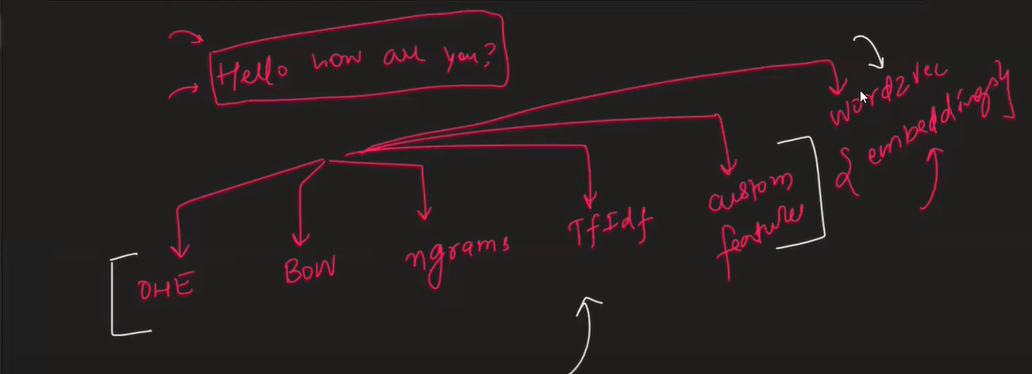

#common terms
corpus (c)- its a collection of all words

vocablory (v)- its a unique no. word in corpus

document(d)- we can say a single review/row as document

word(w)- single word is know as word in documnet

# One hot encoding
ex-

water|is|on|florr

1    |0 | 0|0

0    |1|0|0

0    |0|1 |0

0   |0  |0 |1

pros/advantage- 1.easy to implement

flaws/disadvantage- 1. no fixed size - feacture size is not fixed so its dificult to understand

2- (oov)out of vocablury - if new word does not exit in cropus then it will not predict

3-no capturing of semnetic- mean its dificult to get best result from one hot encoding because ture meananing of sentence is not maintain

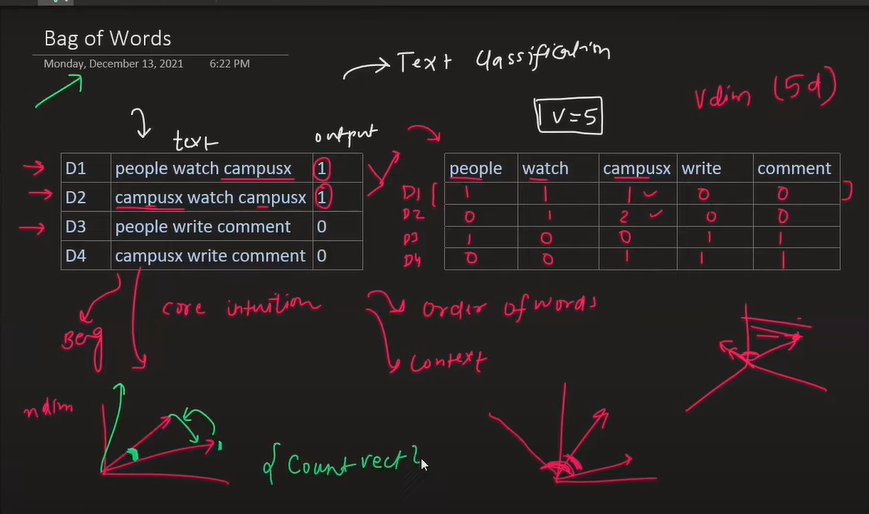

In [ ]:
import pandas as pd
df2=pd.DataFrame({'first':['payal pooja jain','jain pooja rahul','rahul school payal'],'second':[0,1,1]})

In [ ]:
df2

,first,second
0,payal pooja jain,0
1,jain pooja rahul,1
2,rahul school payal,1


In [ ]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [ ]:
new=cv.fit_transform(df2['first'])

In [ ]:
#showing the index value of word
print(cv.vocabulary_)

{'payal': 1, 'pooja': 2, 'jain': 0, 'rahul': 3, 'school': 4}


In [ ]:
print(new[0].toarray())
print(new[1].toarray())
print(new[2].toarray())

[[1 1 1 0 0]]
[[1 0 1 1 0]]
[[0 1 0 1 1]]


In [ ]:
cv.transform([" payal,pooja in school with pooja"]).toarray()

array([[0, 1, 2, 0, 1]])

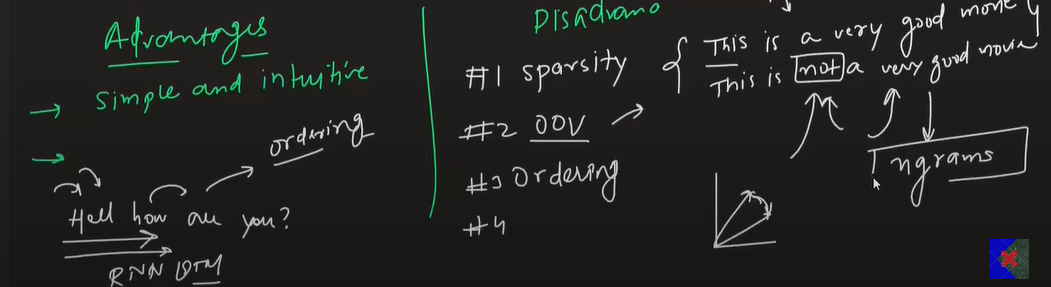

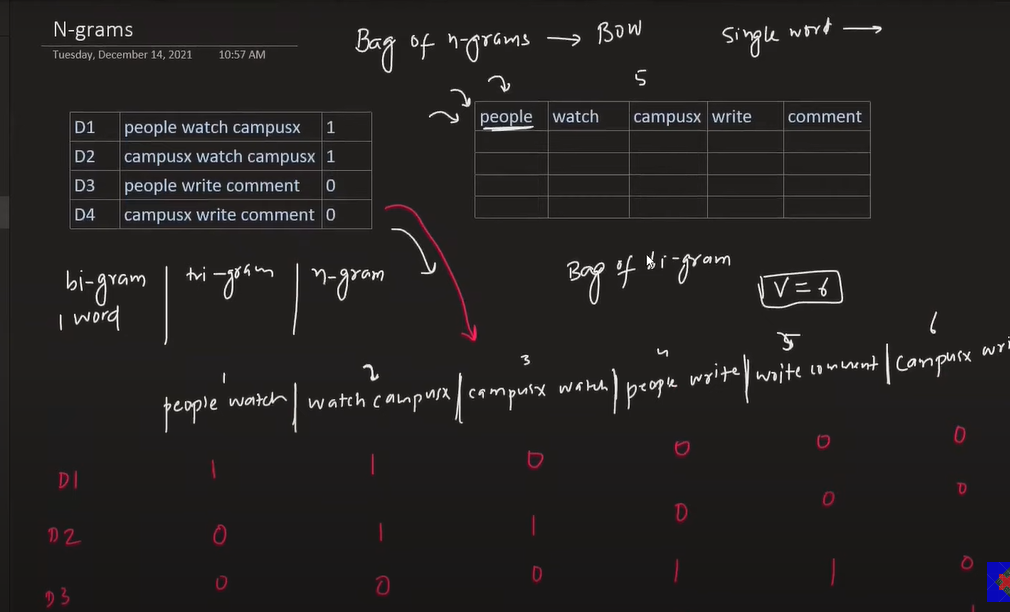

In [ ]:
#n- grams we cretae bi gram, tri gram etc , in bi - gram we take combination of two word like sentence is payal is goiimg to college
# so bi- gram = payal is |is going | going to | to college
#tri-gram = payal is going | is going to | going to college

In [ ]:
import pandas as pd
df2=pd.DataFrame({'first':['payal pooja jain','jain pooja rahul','rahul school payal'],'second':[0,1,1]})

import nltk
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(2,2)) # (2,2) means bi-gram formation; (3,3) means tri- gram; (1,2)means both sigle vector/ word or combination of 2 word
df2=cv.fit_transform(df2['first'])

In [ ]:
#showing the index value of word
print(cv.vocabulary_)

{'payal pooja': 1, 'pooja jain': 2, 'jain pooja': 0, 'pooja rahul': 3, 'rahul school': 4, 'school payal': 5}


In [ ]:
print(df2[0].toarray())
print(df2[1].toarray())
print(df2[2].toarray())

[[0 1 1 0 0 0]]
[[1 0 0 1 0 0]]
[[0 0 0 0 1 1]]


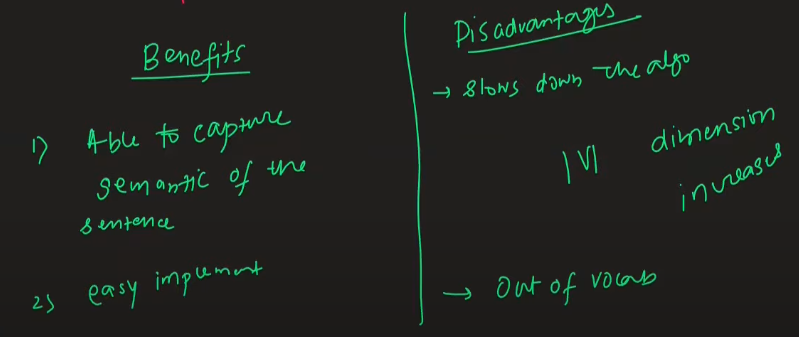

#tf-idf (term frequency- inverce doc frequency)
this techniqe is used to measure frequrecy of word in a doc ex- if payal is reeted many time in doc so its very import word in doc and also we check the total frequency of word in corpus


In [ ]:
df2=pd.DataFrame({'first':['payal pooja jain','jain pooja rahul','rahul school payal'],'second':[0,1,1]})

from sklearn.feature_extraction.text import TfidfVectorizer
Tf=TfidfVectorizer()
x=Tf.fit_transform(df2['first']).toarray()
print(x)

[[0.57735027 0.57735027 0.57735027 0.         0.        ]
 [0.57735027 0.         0.57735027 0.57735027 0.        ]
 [0.         0.51785612 0.         0.51785612 0.68091856]]


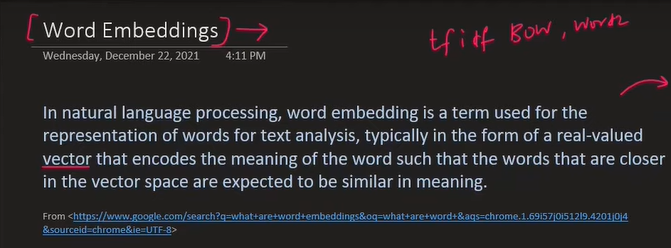

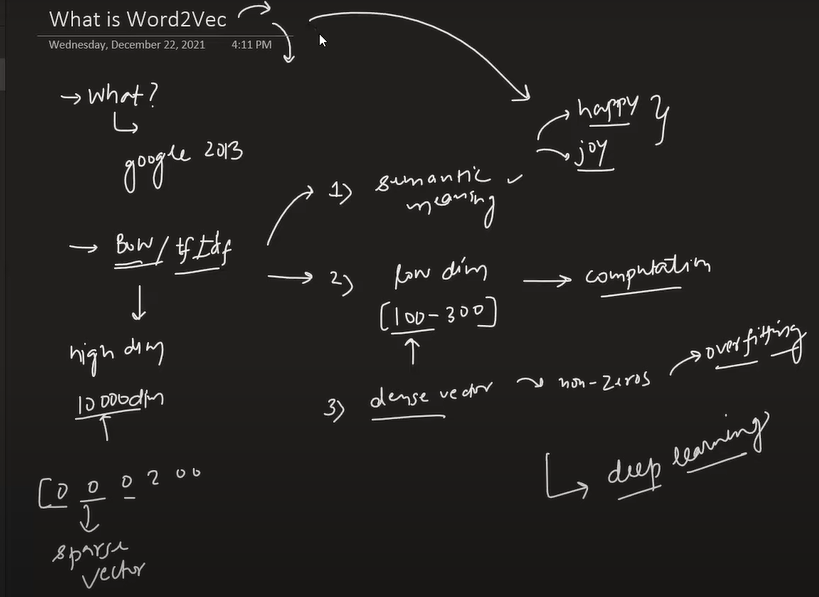


in word2vec we use neural network which created feature accourding to our corpus words but we can't know what is feature name it denoted as f1,f2 it try to find the similarity betwen two vectors/words .below snap shot is example we take

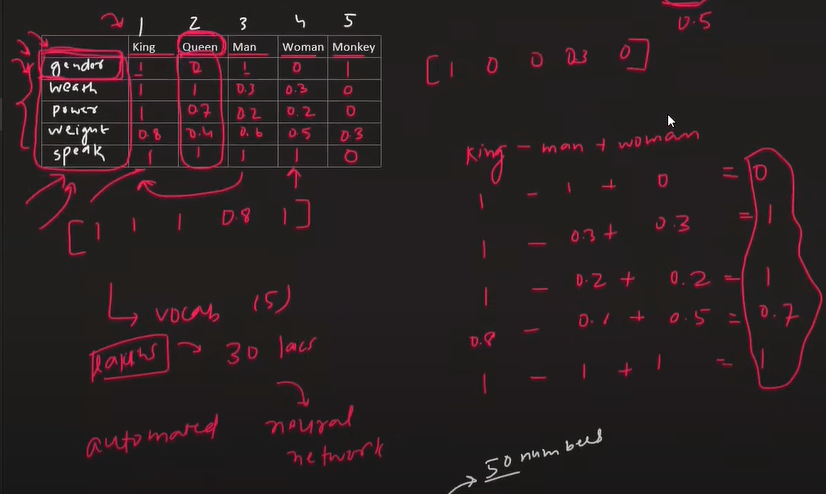


CBOW (Continuous Bag of Words): small data

Skip Gram :large data

to increse model predction:

increse the traing set, increse dimension of vectors , increse window size but it got complex